In [1]:
import numpy as np
import sympy
import sympy.stats
from matplotlib import pyplot as plt

import common

In [2]:
num_dims = 2

In [3]:
theta_0 = np.matrix(np.ones(num_dims)).T
theta_star = np.matrix(np.zeros(num_dims)).T

In [4]:
t1_sym, t2_sym = sympy.symbols(r't_{1} t_{2}')
loss_expr = t1_sym**4 + t1_sym**2 + t1_sym* t2_sym + t2_sym**2
grad_loss_expr = sympy.Matrix([
    loss_expr.diff(t_var)
    for t_var in [t1_sym, t2_sym]
])
hessian_expr = sympy.Matrix([
    [
        g_i.diff(t_var)
        for t_var in [t1_sym, t2_sym]
    ]
    for g_i in grad_loss_expr
])
display(grad_loss_expr)
display(hessian_expr)
display(
    (
        hessian_expr.subs(dict(zip([t1_sym, t2_sym], [item[0,0] for item in theta_star])))
    )
    .is_positive_semidefinite,
)

Matrix([
[4*t_{1}**3 + 2*t_{1} + t_{2}],
[             t_{1} + 2*t_{2}]])

Matrix([
[12*t_{1}**2 + 2, 1],
[              1, 2]])

True

In [5]:
def loss_func(theta):
    t1_val = theta[0,0]
    t2_val = theta[1,0]
    
    loss_val = (
        t1_val**4 + t1_val**2 + t1_val* t2_val + t2_val**2
    )
    
    return loss_val

In [6]:
def grad_loss_func(theta):
    t1_val = theta[0,0]
    t2_val = theta[1,0]
    
    grad_loss_val = np.matrix([
        [4*t1_val**3 + 2*t1_val + t2_val],
        [t1_val + 2*t2_val],
    ])

    return grad_loss_val

In [7]:
loss_func(theta_0)

4.0

In [8]:
grad_loss_func(theta_0)

matrix([[7.],
        [3.]])

In [9]:
loss_func(theta_star)

0.0

In [10]:
grad_loss_func(theta_star)

matrix([[0.],
        [0.]])

In [11]:
num_iteration=300
num_realizations=1_000

In [12]:
sigma = 0.1
noise_dist = sympy.stats.MultivariateNormal(
    r'\boldsymbol{e}',
    mu=sympy.zeros(num_dims,1),
    sigma=sigma**2 * sympy.eye(num_dims),
)

In [13]:
theta_data = [
    common.basic_root_finding(
        noisy_grad_loss_func=common.make_func_with_additive_noise(
            func=grad_loss_func,
            noise_dist=noise_dist,
        ),
        a_k_func=lambda k_index: 1/(k_index+1+100)**(0.501),
        random_state=np.random.RandomState(seed=r_index),
        num_iteration=num_iteration,
        theta_0=theta_star,
    )
    for r_index in range(num_realizations)
]

Mean Theta N Error     : 0.016542352623563236
Mean Theta Bar N Error : 0.0049851480691692485
Mean Theta N Bar Error < Mean Theta N Error: True


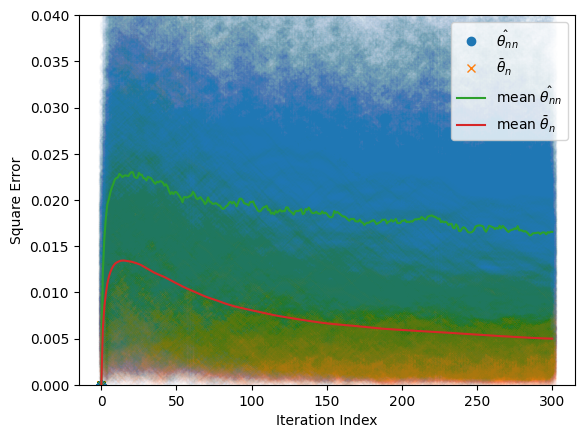

In [14]:
fig1, ax1 = common.plot_error_data(
    theta_data,
    theta_star,
    ylim=[0,0.04],
)

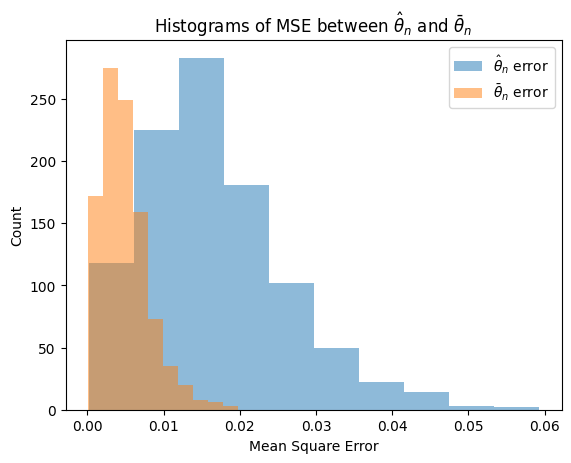

In [15]:
fig2, ax2 = common.plot_error_histogram(
    theta_data,
    theta_star,
)